In [941]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import math
import datetime as dt
import numpy as np
from bokeh.plotting import show
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import tree 
import seaborn as sns
sns.set_style("darkgrid")
import statistics as stat
import random
import matplotlib.pyplot as plt
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

pd.set_option("display.max_columns", None)

# <span style='color:green'> **[done]** </span>Loading Features data

In [942]:
loc = "C:/Users/sagic/[2] UFC_Predictor/data/"
file = 'ufc_data_features.csv'
df = pd.read_csv(loc+file)
df = df[df.columns[1:]]
df.head()

,result,fighter,opponent,date,weight class,method,norm_f_td avg.,norm_f_td acc.,norm_f_td def.,norm_o_td avg.,norm_o_td acc.,norm_o_td def.,f_sub. avg.,norm_f_sub. avg.,norm_o_sub. avg.,norm_f_slpm,norm_o_slpm,norm_f_str. acc.,norm_o_str. acc.,norm_f_str. def,norm_o_str. def,stance_win_ratio,f_win_perc,o_win_perc,f_win_strk,o_win_strk,f_lose_strk,o_lose_strk
0,lose,Tai Tuivasa,Ciryl Gane,2022-09-03,Heavyweight,KO/TKO:Punches,-1.176629,-1.825211,-0.284562,-0.716689,-0.807540,-0.140880,0.0,-0.783342,-0.185186,0.622205,1.348962,0.684931,1.529423,-0.779266,0.773813,1.517162,0.67,0.89,0,1,1,0
1,win,Robert Whittaker,Marvin Vettori,2022-09-03,Middleweight,U-DEC:,-0.545149,-0.025201,1.128300,0.266567,0.309746,0.704616,0.0,-0.783342,-0.051175,0.882388,0.683298,-0.102882,0.060672,0.671752,0.496142,-1.117959,0.79,0.67,1,0,0,1
2,win,Nassourdine Imavov,Joaquin Buckley,2022-09-03,Middleweight,U-DEC:,-0.445037,-0.706286,0.775085,-0.151510,-0.370341,0.348617,2.4,2.138960,-0.855243,0.593296,0.251715,1.078838,-1.114328,0.762441,0.033358,-1.117959,0.80,0.62,3,0,0,1
3,win,Roman Kopylov,Alessio Di Chirico,2022-09-03,Middleweight,KO/TKO:Punches,-0.891693,-0.219796,1.260756,-0.066347,0.066858,1.105114,0.0,-0.783342,-0.855243,0.130750,0.039580,0.094072,-0.428911,0.581063,0.681256,1.517162,0.33,0.36,1,0,0,2
4,lose,Jarno Errens,William Gomis,2022-09-03,Featherweight,U-DEC:,-1.176629,-1.825211,-0.814385,1.125948,1.086989,1.861610,1.0,0.434284,-0.855243,-1.394208,-0.830902,-0.595265,0.158589,0.036932,0.773813,-1.117959,0.00,1.00,0,1,1,0


# <span style='color:green'> **[done]** </span> Y feature Binary encoding

In [943]:
i = 0
for item in df.result:
    if item == 'win':
        df.loc[i,'result'] = 1
    else:
        df.loc[i,'result'] = 0
    i += 1

df['f_win'] = df['result']
df = df.drop(columns=['result'])    
y = df['f_win']
df.head(3)

,fighter,opponent,date,weight class,method,norm_f_td avg.,norm_f_td acc.,norm_f_td def.,norm_o_td avg.,norm_o_td acc.,norm_o_td def.,f_sub. avg.,norm_f_sub. avg.,norm_o_sub. avg.,norm_f_slpm,norm_o_slpm,norm_f_str. acc.,norm_o_str. acc.,norm_f_str. def,norm_o_str. def,stance_win_ratio,f_win_perc,o_win_perc,f_win_strk,o_win_strk,f_lose_strk,o_lose_strk,f_win
0,Tai Tuivasa,Ciryl Gane,2022-09-03,Heavyweight,KO/TKO:Punches,-1.176629,-1.825211,-0.284562,-0.716689,-0.807540,-0.140880,0.0,-0.783342,-0.185186,0.622205,1.348962,0.684931,1.529423,-0.779266,0.773813,1.517162,0.67,0.89,0,1,1,0,0
1,Robert Whittaker,Marvin Vettori,2022-09-03,Middleweight,U-DEC:,-0.545149,-0.025201,1.128300,0.266567,0.309746,0.704616,0.0,-0.783342,-0.051175,0.882388,0.683298,-0.102882,0.060672,0.671752,0.496142,-1.117959,0.79,0.67,1,0,0,1,1
2,Nassourdine Imavov,Joaquin Buckley,2022-09-03,Middleweight,U-DEC:,-0.445037,-0.706286,0.775085,-0.151510,-0.370341,0.348617,2.4,2.138960,-0.855243,0.593296,0.251715,1.078838,-1.114328,0.762441,0.033358,-1.117959,0.80,0.62,3,0,0,1,1


# <span style='color:orange'> **[in-progress]** </span> Visualizing fighters vs opponent key features:

<AxesSubplot:xlabel='norm_o_slpm', ylabel='norm_f_slpm'>

<Figure size 1080x1080 with 0 Axes>

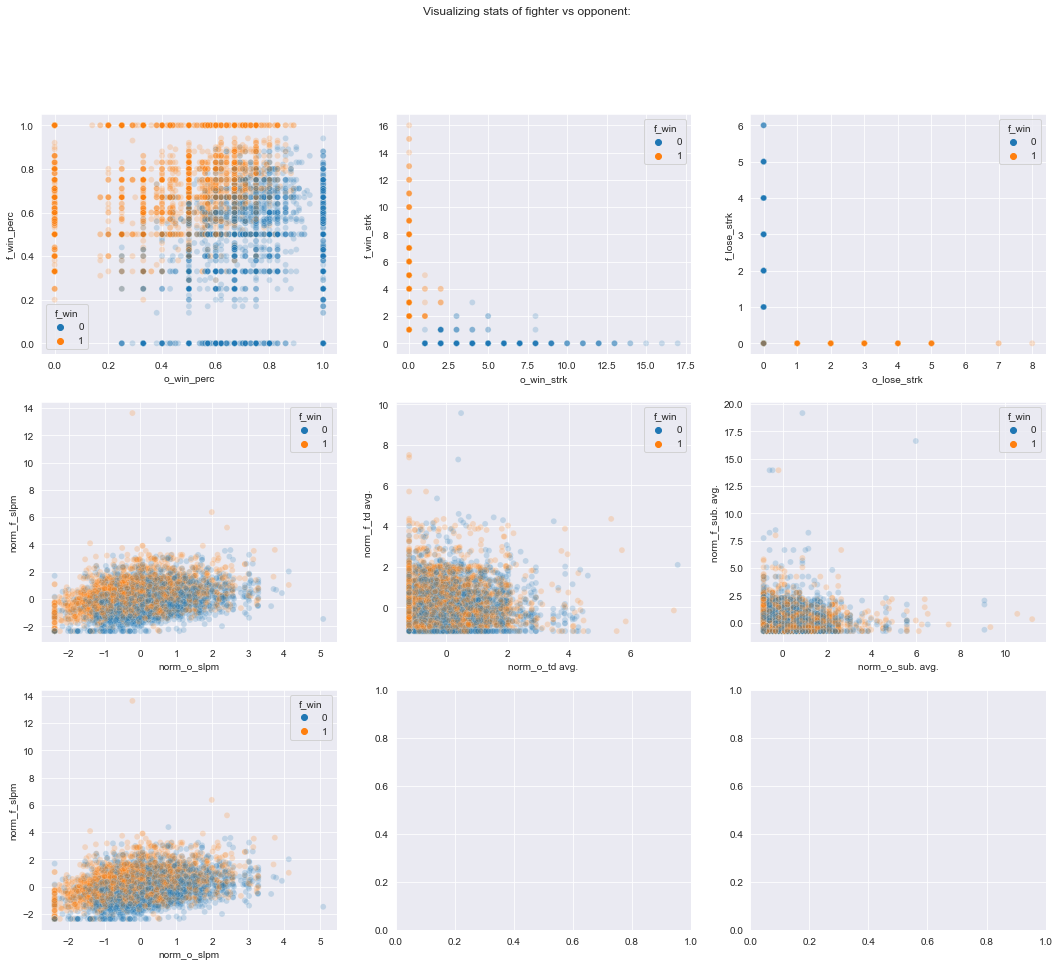

In [999]:
rows=3
cols=3
plt.figure(figsize = (15,15))
fig, axs = plt.subplots(rows,cols,figsize = (18,15))
alp = 0.2
fig.suptitle('Visualizing stats of fighter vs opponent:')

sns.scatterplot(ax=axs[0, 0], data=df, y='f_win_perc', x='o_win_perc', hue='f_win', alpha=alp)
sns.scatterplot(ax=axs[0, 1], data=df, y='f_win_strk', x='o_win_strk', hue='f_win', alpha=alp)
sns.scatterplot(ax=axs[0, 2], data=df, y='f_lose_strk', x='o_lose_strk', hue='f_win', alpha=alp)
sns.scatterplot(ax=axs[1, 0], data=df, y='norm_f_slpm', x='norm_o_slpm', hue='f_win', alpha=alp)
sns.scatterplot(ax=axs[1, 1], data=df, y='norm_f_td avg.', x='norm_o_td avg.', hue='f_win', alpha=alp)
sns.scatterplot(ax=axs[1, 2], data=df, y='norm_f_sub. avg.', x='norm_o_sub. avg.', hue='f_win', alpha=alp)
sns.scatterplot(ax=axs[2, 0], data=df, y='norm_f_slpm', x='norm_o_slpm', hue='f_win', alpha=alp)

# <span style='color:green'> **[done]** </span> Splitting data to Training set/Test set:

In [1115]:
def set_train_test(X_columns, y_column, data=df, test_size=0.3):
    
    data['set'] = None

    for i in range(len(df)):
        if random.random() > test_size:
            data.loc[i,'set'] = 'train'
        else:
            data.loc[i,'set'] = 'test'

    X_train = df[X_columns][data.set=='train'] 
    X_test = df[X_columns][data.set=='test']
    y_train = np.int64(df[y_column][data.set=='train'])
    y_test = np.int64(df[y_column][data.set=='test'])

    print('Data records: ' + str(data.shape))
    print('Train set records: ' + str(X_train.shape))      
    print('Test set Records: ' + str(X_test.shape))
    
    return data

In [1114]:
X_columns = df.columns[5:len(df.columns)-2]
X_columns

Index(['norm_f_td avg.', 'norm_f_td acc.', 'norm_f_td def.', 'norm_o_td avg.',
       'norm_o_td acc.', 'norm_o_td def.', 'f_sub. avg.', 'norm_f_sub. avg.',
       'norm_o_sub. avg.', 'norm_f_slpm', 'norm_o_slpm', 'norm_f_str. acc.',
       'norm_o_str. acc.', 'norm_f_str. def', 'norm_o_str. def',
       'stance_win_ratio', 'f_win_perc', 'o_win_perc', 'f_win_strk',
       'o_win_strk', 'f_lose_strk', 'o_lose_strk', 'f_win'],
      dtype='object')

In [1117]:
df = set_train_test(X_columns=X_columns, y_column='f_win', data=df, test_size=0.3)
df.head()

Data records: (6662, 30)
Train set records: (4672, 23)
Test set Records: (1990, 23)


,fighter,opponent,date,weight class,method,norm_f_td avg.,norm_f_td acc.,norm_f_td def.,norm_o_td avg.,norm_o_td acc.,norm_o_td def.,f_sub. avg.,norm_f_sub. avg.,norm_o_sub. avg.,norm_f_slpm,norm_o_slpm,norm_f_str. acc.,norm_o_str. acc.,norm_f_str. def,norm_o_str. def,stance_win_ratio,f_win_perc,o_win_perc,f_win_strk,o_win_strk,f_lose_strk,o_lose_strk,f_win,set,predicted
0,Tai Tuivasa,Ciryl Gane,2022-09-03,Heavyweight,KO/TKO:Punches,-1.176629,-1.825211,-0.284562,-0.716689,-0.807540,-0.140880,0.0,-0.783342,-0.185186,0.622205,1.348962,0.684931,1.529423,-0.779266,0.773813,1.517162,0.67,0.89,0,1,1,0,0,train,0
1,Robert Whittaker,Marvin Vettori,2022-09-03,Middleweight,U-DEC:,-0.545149,-0.025201,1.128300,0.266567,0.309746,0.704616,0.0,-0.783342,-0.051175,0.882388,0.683298,-0.102882,0.060672,0.671752,0.496142,-1.117959,0.79,0.67,1,0,0,1,1,train,1
2,Nassourdine Imavov,Joaquin Buckley,2022-09-03,Middleweight,U-DEC:,-0.445037,-0.706286,0.775085,-0.151510,-0.370341,0.348617,2.4,2.138960,-0.855243,0.593296,0.251715,1.078838,-1.114328,0.762441,0.033358,-1.117959,0.80,0.62,3,0,0,1,1,test,1
3,Roman Kopylov,Alessio Di Chirico,2022-09-03,Middleweight,KO/TKO:Punches,-0.891693,-0.219796,1.260756,-0.066347,0.066858,1.105114,0.0,-0.783342,-0.855243,0.130750,0.039580,0.094072,-0.428911,0.581063,0.681256,1.517162,0.33,0.36,1,0,0,2,1,train,1
4,Jarno Errens,William Gomis,2022-09-03,Featherweight,U-DEC:,-1.176629,-1.825211,-0.814385,1.125948,1.086989,1.861610,1.0,0.434284,-0.855243,-1.394208,-0.830902,-0.595265,0.158589,0.036932,0.773813,-1.117959,0.00,1.00,0,1,1,0,0,test,0


# <span style='color:green'> **[done]** </span> Train KNN Classifier:

In [1122]:
def set_knn_clf(X_columns=X_columns, y_column='f_win', data=df, n=10):
    
    from sklearn.neighbors import KNeighborsClassifier
    
    knn_clf=KNeighborsClassifier(n_neighbors=n, algorithm='ball_tree')
    X_train = data[X_columns][data.set=='train']
    y_train = np.int64(data[y_column][data.set=='train'])
    knn_clf.fit(X_train,y_train)
    return knn_clf

In [1124]:
def set_predictions(model=knn_clf, data=df, X_columns=X_columns):
    
    data['predicted'] = None
    data['predicted'] = model.predict(data[X_columns])
    return data

In [1128]:
def get_accuracy(y_column='f_win', data=df, data_set='test'):

    actual = np.int64(data[y_column][data.set==data_set])
    predicted = np.int64(data['predicted'][data.set==data_set])
    return accuracy_score(actual, predicted)

In [1134]:
sumdf = pd.DataFrame(columns=['test_size','train_error','test_error'])

for size in [0.1,0.2,0.3,0.4,0.5,0.6,0.7]:
    sumdf.loc[len(sumdf), 'test_size'] = size
    df = set_train_test(X_columns=X_columns, y_column='f_win', data=df, test_size=size)
    knn = set_knn_clf(X_columns=X_columns, y_column='f_win', data=df, n=100)
    df = set_predictions(model=knn, data=df, X_columns=X_columns)
    sumdf.loc[len(sumdf), 'test_error'] = get_accuracy(y_column='f_win', data=df, data_set='test')
    sumdf.loc[len(sumdf), 'train_error'] = get_accuracy(y_column='f_win', data=df, data_set='train')
    
sumdf    

Data records: (6662, 30)
Train set records: (6012, 23)
Test set Records: (650, 23)
Data records: (6662, 30)
Train set records: (5362, 23)
Test set Records: (1300, 23)
Data records: (6662, 30)
Train set records: (4645, 23)
Test set Records: (2017, 23)
Data records: (6662, 30)
Train set records: (4032, 23)
Test set Records: (2630, 23)
Data records: (6662, 30)
Train set records: (3298, 23)
Test set Records: (3364, 23)
Data records: (6662, 30)
Train set records: (2615, 23)
Test set Records: (4047, 23)
Data records: (6662, 30)
Train set records: (1975, 23)
Test set Records: (4687, 23)


,test_size,train_error,test_error
0,0.1,NaN,NaN
1,NaN,NaN,0.990769
2,NaN,0.993513,NaN
3,0.2,NaN,NaN
4,NaN,NaN,0.992308
5,NaN,0.993473,NaN
6,0.3,NaN,NaN
7,NaN,NaN,0.992563
8,NaN,0.993326,NaN
9,0.4,NaN,NaN


In [ ]:
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

In [1132]:
knn = set_knn_clf(X_columns=X_columns, y_column='f_win', data=df, n=100)
set_predictions(model=knn, data=df, X_columns=X_columns)
print(get_accuracy(y_column='f_win', data=df, data_set='test'))
print(get_accuracy(y_column='f_win', data=df, data_set='train'))

0.9984924623115577
0.9970034246575342


In [1011]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf=KNeighborsClassifier(n_neighbors=1, algorithm='ball_tree')
knn_clf.fit(X_train,y_train)
y_pred = knn_clf.predict(X_test)
df = set_predictions(model=knn_clf, data=df, features=X_columns)
knn_clf

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=1)

Accuracy = 0.9950
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1010
           1       1.00      1.00      1.00      1003

    accuracy                           1.00      2013
   macro avg       1.00      1.00      1.00      2013
weighted avg       1.00      1.00      1.00      2013



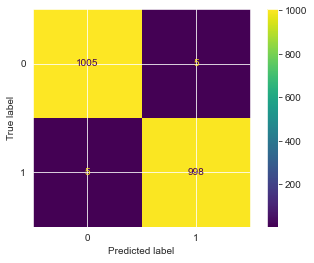

In [1012]:
from sklearn.metrics import ConfusionMatrixDisplay

model = knn_clf
print('Accuracy = %.4f' % accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test, y_pred, labels=y.unique())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y.unique())
disp.plot()

In [1013]:
print('Model miss-classifications:')
df[(df['f_win']!=df['predicted']) & (df.set=='test')]

Model miss-classifications:


,fighter,opponent,date,weight class,method,norm_f_td avg.,norm_f_td acc.,norm_f_td def.,norm_o_td avg.,norm_o_td acc.,norm_o_td def.,f_sub. avg.,norm_f_sub. avg.,norm_o_sub. avg.,norm_f_slpm,norm_o_slpm,norm_f_str. acc.,norm_o_str. acc.,norm_f_str. def,norm_o_str. def,stance_win_ratio,f_win_perc,o_win_perc,f_win_strk,o_win_strk,f_lose_strk,o_lose_strk,f_win,set,predicted
625,Harold Howard,Steve Jennum,1994-09-09,Open Weight,KO/TKO:Punches,-1.176629,-1.825211,-2.580463,-1.196704,-1.827670,-2.588369,0.0,-0.783342,-0.855243,-2.355438,-2.388993,-4.238900,-4.247662,-4.860254,-4.964713,0.016641,0.50,1.00,1,1,0,0,0,test,1
653,Oleg Taktarov,David Abbott,1995-07-14,Open Weight,SUB:Rear Naked Choke,-1.176629,-1.825211,-2.580463,-0.368291,-0.224608,0.348617,0.0,-0.783342,-0.855243,-2.355438,-1.401471,-4.238900,-1.310161,-4.860254,-1.447552,-2.107576,0.80,0.67,4,2,0,0,1,test,0
1650,Davey Grant,Marlon Vera,2016-02-27,Bantamweight,U-DEC:,0.055526,0.218044,0.289413,-0.670236,0.212591,0.437617,0.1,-0.661579,0.618883,1.135343,0.741818,0.094072,0.648173,0.218309,-0.244313,-2.107576,0.50,0.33,1,0,0,1,1,test,0
4002,David Abbott,Steve Nelmark,1996-12-07,Open Weight,KO/TKO:Punch,-0.352625,-0.219796,0.333565,-1.196704,-1.827670,-2.588369,0.0,-0.783342,-0.855243,-1.379754,-2.388993,-1.284601,-4.247662,-1.414086,-4.964713,-0.858328,0.60,0.67,2,1,0,0,1,test,0
4052,Zach Light,Pete Spratt,2002-06-22,Welterweight,SUB:Armbar,-0.129297,3.039681,-2.580463,-0.964439,3.030094,-0.541378,0.0,-0.783342,-0.453209,-1.770027,-1.196651,-0.989171,0.452339,-0.507200,0.125915,0.016641,0.00,1.00,0,1,1,0,0,test,1
5309,Ivan Salaverry,Joe Riggs,2005-04-16,Middleweight,SUB:Triangle Choke,-0.799281,-0.949530,-0.990993,0.700129,0.844100,0.170618,2.5,2.260723,-0.051175,-0.180024,-0.626083,0.389502,0.746089,2.032081,0.311028,-1.117959,0.75,0.50,2,0,0,1,1,test,0
5365,AJ Dobson,Jacob Malkoun,2022-02-12,Middleweight,U-DEC:,-0.575953,0.607235,0.156957,4.184106,0.018280,-2.588369,0.8,0.190759,0.082837,1.041388,-0.128664,1.374268,1.431506,-1.323398,-0.984768,0.016641,0.00,0.67,0,2,1,0,0,test,1
5806,Dan Bobish,Mark Kerr,1997-07-27,Heavyweight,SUB:Other,0.702408,0.218044,-2.580463,1.064011,1.912809,-2.588369,1.6,1.164860,-0.319198,-0.866616,-2.184174,0.094072,-0.233078,-1.776841,-2.373121,-2.593269,0.50,1.00,1,2,0,0,0,test,1
6423,Martin Bravo,Humberto Bandenay,2017-08-05,Featherweight,KO/TKO:Kick,0.825623,-0.122499,1.172452,1.048526,0.406902,0.170618,0.0,-0.783342,-0.185186,3.180666,-0.765068,-0.398312,-0.233078,-0.235134,-1.169882,1.087773,0.50,1.00,0,1,1,0,0,test,1
6563,Sam Hoger,Bobby Southworth,2005-04-09,Light Heavyweight,U-DEC:,-0.314120,0.023448,-1.300056,1.884681,1.961386,0.259618,1.3,0.799572,0.886906,-1.582118,-1.664810,-1.776984,-0.428911,0.308997,1.051483,0.016641,1.00,0.00,1,0,0,1,1,test,0


# <span style='color:orange'> **[in-progress]** </span> Feature's Ranking:
permutate each feature to see its effect on model accuracy

## <span style='color:orange'> **[in-progress]** </span> Career statistics importance(=most important features):

In [1101]:
from sklearn.tree import DecisionTreeClassifier

career_stats_features = ['f_win_perc','o_win_perc','f_win_strk','o_win_strk','f_lose_strk','o_lose_strk']
tree_depth = int(len(career_stats_features)/2) #number of features

tree_clf = DecisionTreeClassifier(max_depth=tree_depth, random_state=1)
X_train = data[df.columns[5:len(df.columns)-3]][data.set=='train']
y_train = np.int64(data.f_win[data.set=='train'])
tree_clf.fit(X_train,y_train)
tree_clf

DecisionTreeClassifier(max_depth=3, random_state=1)

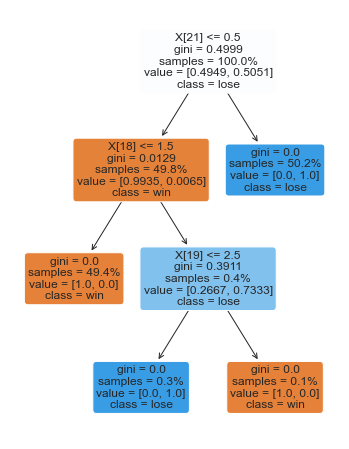

In [1113]:
import matplotlib.pyplot as plt
from sklearn import tree 

fig = plt.figure(figsize=(6, 8))

tree.plot_tree(tree_clf,
               #feature_names = career_stats_features, 
               class_names= ['win','lose'],
               max_depth= tree_depth,
               rounded=True, 
               filled = True,
               proportion = True, 
               precision = 4,
               impurity = True,
               fontsize=12
              );

## <span style='color:orange'> **[in-progress]** </span> Fighter's statistics importance:

In [1089]:
def get_model_acc(data=rank_df):
    
    from sklearn.neighbors import KNeighborsClassifier

    knn_clf=KNeighborsClassifier(n_neighbors=1, algorithm='ball_tree')
    X_train = data[df.columns[5:len(df.columns)-3]][data.set=='train']
    y_train = np.int64(data.f_win[data.set=='train'])
    knn_clf.fit(X_train,y_train)
    
    X_test = data[df.columns[5:len(df.columns)-3]][data.set=='test']
    y_test = np.int64(data.f_win[data.set=='test'])
    y_pred = knn_clf.predict(X_test)

    return accuracy_score(y_test, y_pred)

In [1090]:
y_train = np.int64(data.f_win[data.set=='train'])
y_train

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [1091]:
knn_clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=1)

In [1092]:
rank_df = (df[df.columns[5:]]).copy()
rank_df.head()

,norm_f_td avg.,norm_f_td acc.,norm_f_td def.,norm_o_td avg.,norm_o_td acc.,norm_o_td def.,f_sub. avg.,norm_f_sub. avg.,norm_o_sub. avg.,norm_f_slpm,norm_o_slpm,norm_f_str. acc.,norm_o_str. acc.,norm_f_str. def,norm_o_str. def,stance_win_ratio,f_win_perc,o_win_perc,f_win_strk,o_win_strk,f_lose_strk,o_lose_strk,f_win,set,predicted
0,-1.176629,-1.825211,-0.284562,-0.716689,-0.807540,-0.140880,0.0,-0.783342,-0.185186,0.622205,1.348962,0.684931,1.529423,-0.779266,0.773813,1.517162,0.67,0.89,0,1,1,0,0,test,0
1,-0.545149,-0.025201,1.128300,0.266567,0.309746,0.704616,0.0,-0.783342,-0.051175,0.882388,0.683298,-0.102882,0.060672,0.671752,0.496142,-1.117959,0.79,0.67,1,0,0,1,1,train,1
2,-0.445037,-0.706286,0.775085,-0.151510,-0.370341,0.348617,2.4,2.138960,-0.855243,0.593296,0.251715,1.078838,-1.114328,0.762441,0.033358,-1.117959,0.80,0.62,3,0,0,1,1,train,1
3,-0.891693,-0.219796,1.260756,-0.066347,0.066858,1.105114,0.0,-0.783342,-0.855243,0.130750,0.039580,0.094072,-0.428911,0.581063,0.681256,1.517162,0.33,0.36,1,0,0,2,1,test,1
4,-1.176629,-1.825211,-0.814385,1.125948,1.086989,1.861610,1.0,0.434284,-0.855243,-1.394208,-0.830902,-0.595265,0.158589,0.036932,0.773813,-1.117959,0.00,1.00,0,1,1,0,0,train,0


In [1099]:
rank_df = (df[df.columns[5:]]).copy()
features = rank_df.columns[0:len(rank_df)-2]
original_score = accuracy_score(y_test, y_pred)
original_df = rank_df.copy()

for index in range(0, len(features)-1):
    rank_df = original_df
    rank_df[features[index]] = np.random.permutation(rank_df[features[index]])
    acc = get_model_acc(data=rank_df)
    delta = original_score - acc
    print('permutate: %s, accuracy= %.5f, delta= %.5f' %(features[index], acc, delta))

permutate: norm_f_td avg., accuracy= 0.99603, delta= -0.00099
permutate: norm_f_td acc., accuracy= 0.99603, delta= -0.00099
permutate: norm_f_td def., accuracy= 0.99603, delta= -0.00099
permutate: norm_o_td avg., accuracy= 0.99503, delta= 0.00000
permutate: norm_o_td acc., accuracy= 0.99404, delta= 0.00099
permutate: norm_o_td def., accuracy= 0.99503, delta= 0.00000
permutate: f_sub. avg., accuracy= 0.99404, delta= 0.00099
permutate: norm_f_sub. avg., accuracy= 0.99305, delta= 0.00199
permutate: norm_o_sub. avg., accuracy= 0.99454, delta= 0.00050
permutate: norm_f_slpm, accuracy= 0.99553, delta= -0.00050
permutate: norm_o_slpm, accuracy= 0.99404, delta= 0.00099
permutate: norm_f_str. acc., accuracy= 0.99354, delta= 0.00149
permutate: norm_o_str. acc., accuracy= 0.99503, delta= 0.00000
permutate: norm_f_str. def, accuracy= 0.99603, delta= -0.00099
permutate: norm_o_str. def, accuracy= 0.99603, delta= -0.00099
permutate: stance_win_ratio, accuracy= 0.99702, delta= -0.00199
permutate: f_w

In [1040]:
column_name = rank_df.columns[0]
rank_df[column_name] = np.random.permutation(rank_df[column_name])
get_model_acc(data=rank_df)


0.9950322901142573

In [855]:
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

SyntaxError: invalid syntax (1931014809.py, line 1)

In [516]:
def get_log_model_acc(X, y, test_size=0.3):
    
    '''return logistic regression model accuracy(=correct predictions/all predictions)'''
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
    
    logreg = LogisticRegression(random_state=1).fit(X, y)
    y_pred = logreg.predict(X_test)
    
    return accuracy_score(y_test, y_pred)

In [517]:
rank_df = (df[df.columns[6:]]).copy()
rank_df['result'] = df['result']

rank_df.head()

,norm_f_td avg.,norm_f_td acc.,norm_f_td def.,norm_o_td avg.,norm_o_td acc.,norm_o_td def.,f_sub. avg.,norm_f_sub. avg.,norm_o_sub. avg.,norm_f_slpm,norm_o_slpm,norm_f_str. acc.,norm_o_str. acc.,norm_f_str. def,norm_o_str. def,stance_win_ratio,f_win_perc,o_win_perc,f_win_strk,o_win_strk,f_lose_strk,o_lose_strk,result
0,-1.176629,-1.825211,-0.284562,-0.716689,-0.807540,-0.140880,0.0,-0.783342,-0.185186,0.622205,1.348962,0.684931,1.529423,-0.779266,0.773813,1.517162,0.67,0.89,0,1,1,0,lose
1,-0.545149,-0.025201,1.128300,0.266567,0.309746,0.704616,0.0,-0.783342,-0.051175,0.882388,0.683298,-0.102882,0.060672,0.671752,0.496142,-1.117959,0.79,0.67,1,0,0,1,win
2,-0.445037,-0.706286,0.775085,-0.151510,-0.370341,0.348617,2.4,2.138960,-0.855243,0.593296,0.251715,1.078838,-1.114328,0.762441,0.033358,-1.117959,0.80,0.62,3,0,0,1,win
3,-0.891693,-0.219796,1.260756,-0.066347,0.066858,1.105114,0.0,-0.783342,-0.855243,0.130750,0.039580,0.094072,-0.428911,0.581063,0.681256,1.517162,0.33,0.36,1,0,0,2,win
4,-1.176629,-1.825211,-0.814385,1.125948,1.086989,1.861610,1.0,0.434284,-0.855243,-1.394208,-0.830902,-0.595265,0.158589,0.036932,0.773813,-1.117959,0.00,1.00,0,1,1,0,lose


In [518]:
perm_column = rank_df.columns[0]

X = rank_df[rank_df.columns[0:len(rank_df.columns)-1]]
y = rank_df['result']
original_acc = get_log_model_acc(X=X, y=y, test_size=0.3)
print('+column<%s> accuracy = %f' %(perm_column,original_acc))
rank_df.head()

+column<norm_f_td avg.> accuracy = 1.000000


,norm_f_td avg.,norm_f_td acc.,norm_f_td def.,norm_o_td avg.,norm_o_td acc.,norm_o_td def.,f_sub. avg.,norm_f_sub. avg.,norm_o_sub. avg.,norm_f_slpm,norm_o_slpm,norm_f_str. acc.,norm_o_str. acc.,norm_f_str. def,norm_o_str. def,stance_win_ratio,f_win_perc,o_win_perc,f_win_strk,o_win_strk,f_lose_strk,o_lose_strk,result
0,-1.176629,-1.825211,-0.284562,-0.716689,-0.807540,-0.140880,0.0,-0.783342,-0.185186,0.622205,1.348962,0.684931,1.529423,-0.779266,0.773813,1.517162,0.67,0.89,0,1,1,0,lose
1,-0.545149,-0.025201,1.128300,0.266567,0.309746,0.704616,0.0,-0.783342,-0.051175,0.882388,0.683298,-0.102882,0.060672,0.671752,0.496142,-1.117959,0.79,0.67,1,0,0,1,win
2,-0.445037,-0.706286,0.775085,-0.151510,-0.370341,0.348617,2.4,2.138960,-0.855243,0.593296,0.251715,1.078838,-1.114328,0.762441,0.033358,-1.117959,0.80,0.62,3,0,0,1,win
3,-0.891693,-0.219796,1.260756,-0.066347,0.066858,1.105114,0.0,-0.783342,-0.855243,0.130750,0.039580,0.094072,-0.428911,0.581063,0.681256,1.517162,0.33,0.36,1,0,0,2,win
4,-1.176629,-1.825211,-0.814385,1.125948,1.086989,1.861610,1.0,0.434284,-0.855243,-1.394208,-0.830902,-0.595265,0.158589,0.036932,0.773813,-1.117959,0.00,1.00,0,1,1,0,lose


In [519]:
rank_df[perm_column] = np.random.permutation(rank_df[perm_column])
X = rank_df[rank_df.columns[0:len(rank_df.columns)-1]] 
perm_acc = get_log_model_acc(X=X, y=y, test_size=0.3)

print('-column<%s> accuracy = %f' %(perm_column,perm_acc))
print('column<%s> importance = %f' %(perm_column,original_acc-perm_acc))
rank_df.head()

-column<norm_f_td avg.> accuracy = 1.000000
column<norm_f_td avg.> importance = 0.000000


,norm_f_td avg.,norm_f_td acc.,norm_f_td def.,norm_o_td avg.,norm_o_td acc.,norm_o_td def.,f_sub. avg.,norm_f_sub. avg.,norm_o_sub. avg.,norm_f_slpm,norm_o_slpm,norm_f_str. acc.,norm_o_str. acc.,norm_f_str. def,norm_o_str. def,stance_win_ratio,f_win_perc,o_win_perc,f_win_strk,o_win_strk,f_lose_strk,o_lose_strk,result
0,4.429678,-1.825211,-0.284562,-0.716689,-0.807540,-0.140880,0.0,-0.783342,-0.185186,0.622205,1.348962,0.684931,1.529423,-0.779266,0.773813,1.517162,0.67,0.89,0,1,1,0,lose
1,1.079755,-0.025201,1.128300,0.266567,0.309746,0.704616,0.0,-0.783342,-0.051175,0.882388,0.683298,-0.102882,0.060672,0.671752,0.496142,-1.117959,0.79,0.67,1,0,0,1,win
2,-0.629860,-0.706286,0.775085,-0.151510,-0.370341,0.348617,2.4,2.138960,-0.855243,0.593296,0.251715,1.078838,-1.114328,0.762441,0.033358,-1.117959,0.80,0.62,3,0,0,1,win
3,1.233775,-0.219796,1.260756,-0.066347,0.066858,1.105114,0.0,-0.783342,-0.855243,0.130750,0.039580,0.094072,-0.428911,0.581063,0.681256,1.517162,0.33,0.36,1,0,0,2,win
4,-0.298718,-1.825211,-0.814385,1.125948,1.086989,1.861610,1.0,0.434284,-0.855243,-1.394208,-0.830902,-0.595265,0.158589,0.036932,0.773813,-1.117959,0.00,1.00,0,1,1,0,lose


In [520]:
log_df = pd.DataFrame(columns=['num_of_features','accuracy','features'])

first_column = 6

i = 0
for current_column in range(first_column, len(df.columns)-1):
    column_list = list(df.columns[current_column:len(df.columns)-1])
    log_df.loc[i,'features'] = column_list
    log_df.loc[i,'accuracy'] = get_log_model_acc(X=log_df[column_list], test_size=0.3)
    log_df.loc[i,'num_of_features'] = len(column_list)
    i += 1

log_df.head(20)

KeyError: "None of [Index(['norm_f_td avg.', 'norm_f_td acc.', 'norm_f_td def.', 'norm_o_td avg.',\n       'norm_o_td acc.', 'norm_o_td def.', 'f_sub. avg.', 'norm_f_sub. avg.',\n       'norm_o_sub. avg.', 'norm_f_slpm', 'norm_o_slpm', 'norm_f_str. acc.',\n       'norm_o_str. acc.', 'norm_f_str. def', 'norm_o_str. def',\n       'stance_win_ratio', 'f_win_perc', 'o_win_perc', 'f_win_strk',\n       'o_win_strk', 'f_lose_strk'],\n      dtype='object')] are in the [columns]"